# THE SPARK FOUNDATION.


### Data Science and Buisness Analytics Intern GRIP(August 2021)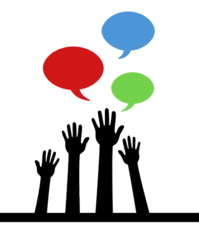  

## TASK 1 : Prediction Using Supervised Machine Learning

### Author : Amal jeev S

## Problem Statement

   > Predict the percentage of a student based on the number of study hours
   
   > What will be the predicted score if a student studies for 9.25 hrs?

### Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Data set

In [6]:
url = 'https://bit.ly/w-data'
data = pd.read_csv(url)

### Exploratory Data Analysis

In [7]:
# first five rows of dataframe
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# concise summary of dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# descriptive statistics of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
# checking correlation
data.corr(method= 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [11]:
# checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Visualizing Data

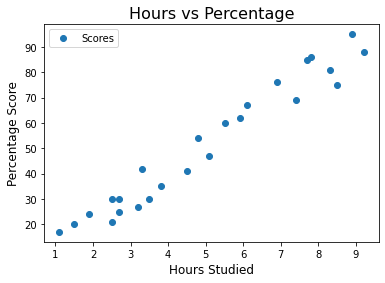

In [12]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage', fontsize=16)  
plt.xlabel('Hours Studied',fontsize=12)  
plt.ylabel('Percentage Score', fontsize=12)  
plt.show()

### Preparing the data

In [13]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

### Training the Model

In [15]:
# Linear Regression
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

### Plotting the regression line

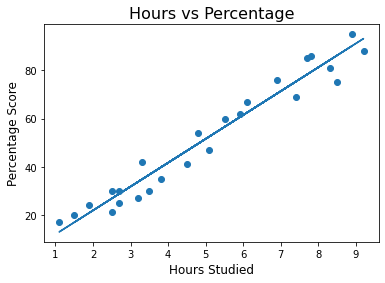

In [16]:
line = regressor.coef_ * X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.title('Hours vs Percentage', fontsize=16)  
plt.xlabel('Hours Studied',fontsize=12)  
plt.ylabel('Percentage Score', fontsize=12)  
plt.plot(X, line);
plt.show()

### Making Predictions

In [17]:
# test data
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing Actual vs Predicted

y_pred = regressor.predict(X_test)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({ 'Actual_Score': y_test, 'Predicted_Score': y_pred})  
df

,Actual_Score,Predicted_Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating the Model

In [19]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print ('R2 Score:', r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
R2 Score: 0.9454906892105356


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [20]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
